This notebook for Cellpose application is adoptted from https://github.com/MouseLand/cellpose/blob/main/notebooks/run_cellpose.ipynb

Students can develop from here and try different models and parameters.

Liya Ding

In [1]:
import numpy as np
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
from cellpose import utils, io
from tifffile import imread, imwrite

(-0.5, 255.5, 255.5, -0.5)

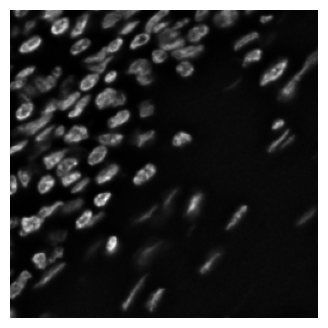

In [2]:
# read in image sequence ( get the data ready with the "get_images.ipynb" in data preparation part and use the correct path)
filename = '/mnt/d/lding/dsi_clinic/cellsegmentation/data/tissuenet_v1.1/tissuenet_v1.1_test/img_C0/img_C0_0524.tiff'

img = io.imread(filename)
plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.axis('off')


In [3]:
# Run Cellpose

from cellpose import models, io

# DEFINE CELLPOSE MODEL
# model_type='cyto3' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='cyto3')

masks, flows, styles, diams = model.eval(img)


/home/ldin/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/cellpose/resnet_torch.py:280: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(filename, ma

In [4]:
# save the segmentation results -- the labels, to a tif file for future evaluation 
output_dir = '/mnt/d/lding/dsi_clinic/cellsegmentation/data/tissuenet_v1.1/tissuenet_v1.1_test/img_C0/C0_selected_seg_stardist'
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)

imwrite(os.path.join(output_dir, 'testimage_cellpose_cyto3_resultlabels.tif'), masks)
    

/tmp/ipykernel_73571/3263962573.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  tab20 = cm.get_cmap('tab20', 10)
/tmp/ipykernel_73571/3263962573.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  newmap = cm.get_cmap('tab20', 4000+1)


(-0.5, 255.5, 255.5, -0.5)

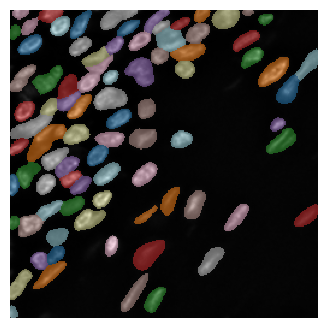

In [5]:
# display the segmentation results with our own colormap

# build the colormap with iterative tab20
tab20 = cm.get_cmap('tab20', 10)
for i in range(10):
    tab20.colors = np.concatenate([tab20.colors,tab20.colors],axis=0)    
tab20.colors = np.concatenate([np.zeros([1,4]),tab20.colors],axis=0)
newmap = cm.get_cmap('tab20', 4000+1)
newmap.colors = tab20.colors[0:4000+1,:]
newmap.colors[0,:]  = [0,0,0,1] # black for background

# display
plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.imshow(masks, cmap=newmap, interpolation='None',alpha=0.5)
plt.axis('off')


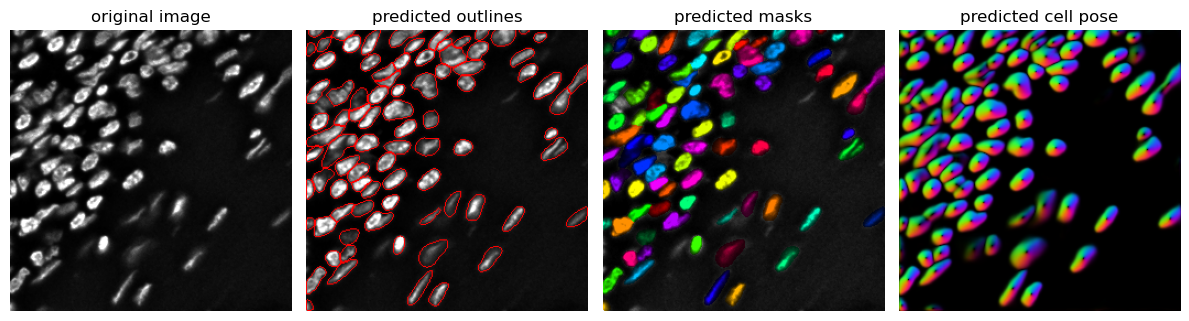

In [6]:
# Display the results with cellpose's tool of displaying 4 panels
from cellpose import plot
fig = plt.figure(figsize=(12,5))
plot.show_segmentation(fig, img, masks, flows[0])
plt.tight_layout()
plt.show()